Based on [this vignette](https://cran.r-project.org/web/packages/tidyquant/vignettes/TQ04-charting-with-tidyquant.html)

In [ ]:
# Loads tidyquant, lubridate, xts, quantmod, TTR, and PerformanceAnalytics
library(tidyverse)
library(tidyquant)

In [ ]:
# Use FANG data set
data("FANG") 

# Get AAPL and AMZN Stock Prices
AAPL <- tq_get("AAPL", get = "stock.prices", from = "2015-09-01", to = "2016-12-31")
AMZN <- tq_get("AMZN", get = "stock.prices", from = "2000-01-01", to = "2016-12-31")

In [3]:
end <- as_date("2016-12-31")

## Charts

### Line charts

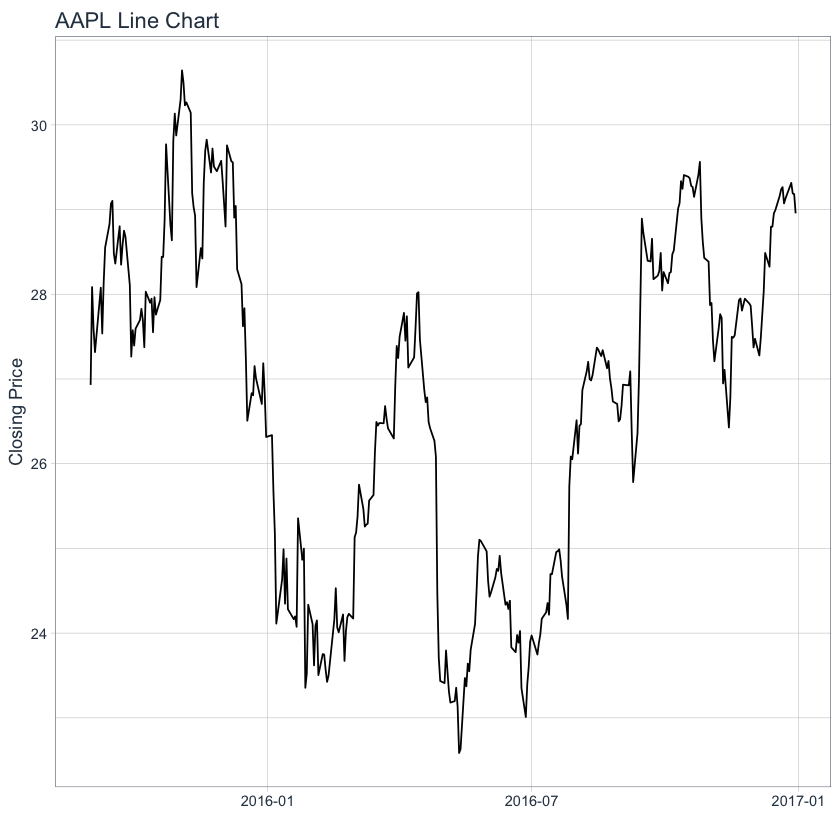

In [4]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_line() +
    labs(title = "AAPL Line Chart", y = "Closing Price", x = "") + 
    theme_tq()

### OHLC bar charts

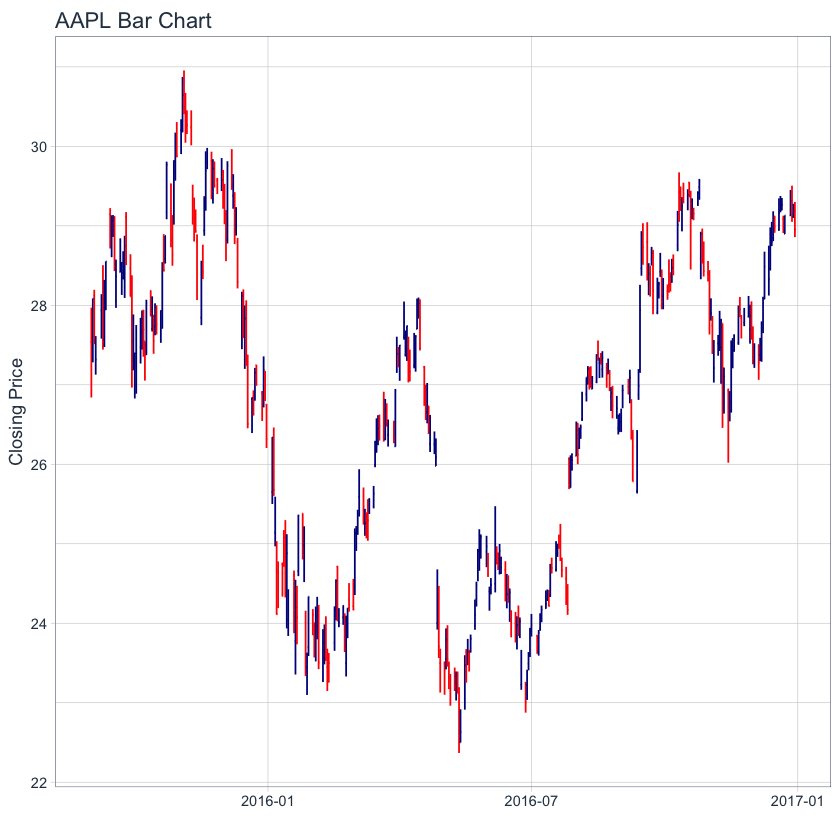

In [5]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_barchart(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Bar Chart", y = "Closing Price", x = "") + 
    theme_tq()

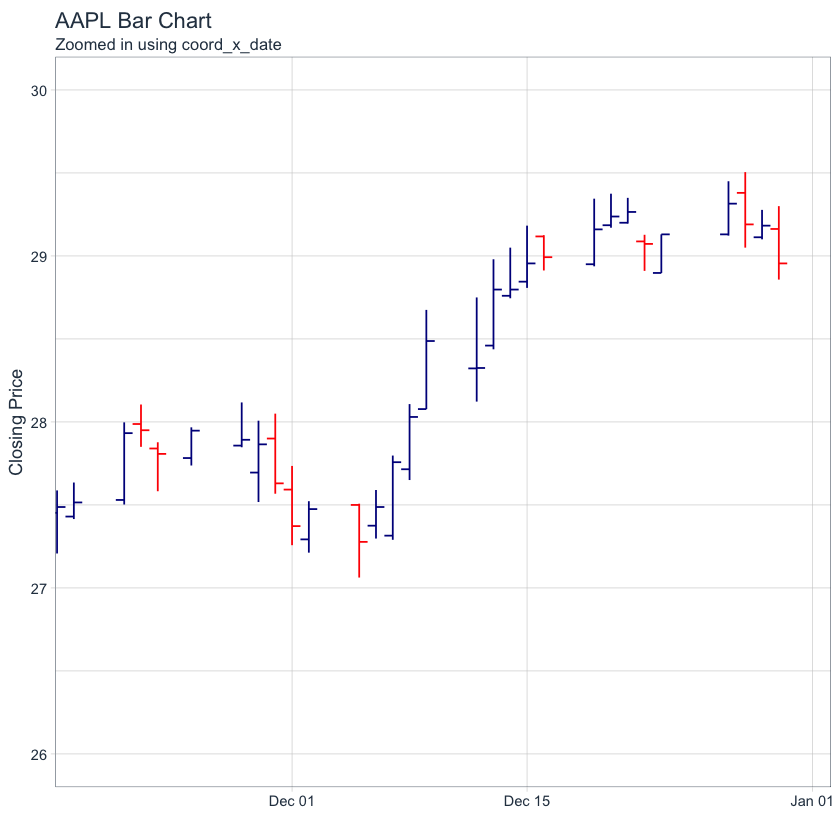

In [9]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_barchart(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Bar Chart", 
         subtitle = "Zoomed in using coord_x_date",
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(6), end),
                 ylim = c(26, 30)) + 
    theme_tq()

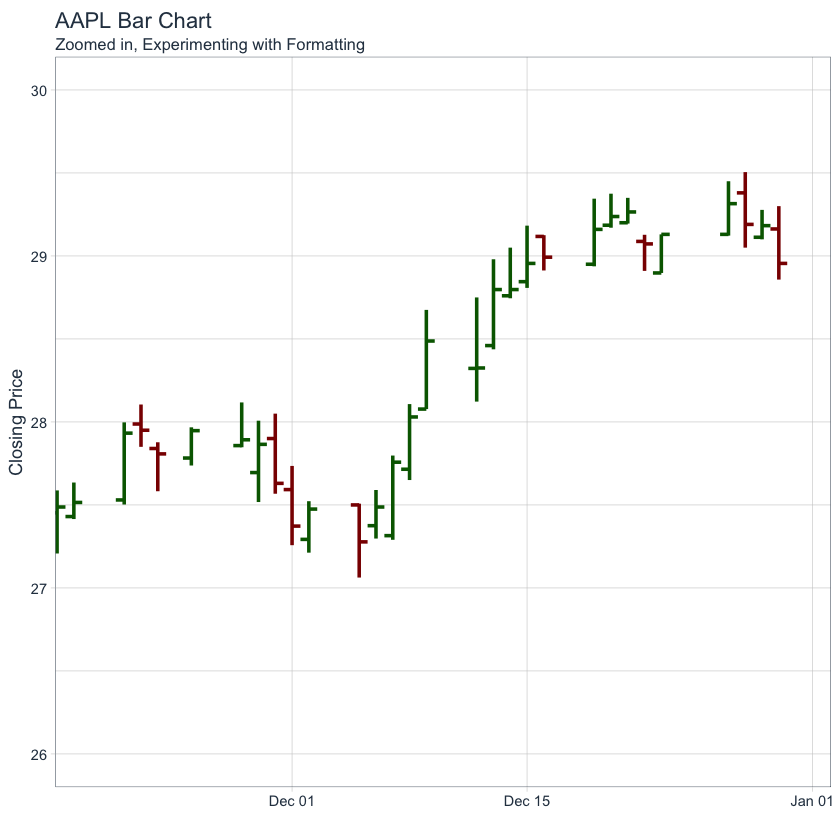

In [10]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_barchart(aes(open = open, high = high, low = low, close = close),
                     colour_up = "darkgreen", colour_down = "darkred", size = 1) +
    labs(title = "AAPL Bar Chart", 
         subtitle = "Zoomed in, Experimenting with Formatting",
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(6), end),
                 ylim = c(26, 30)) + 
    theme_tq()

### Candlestick chart

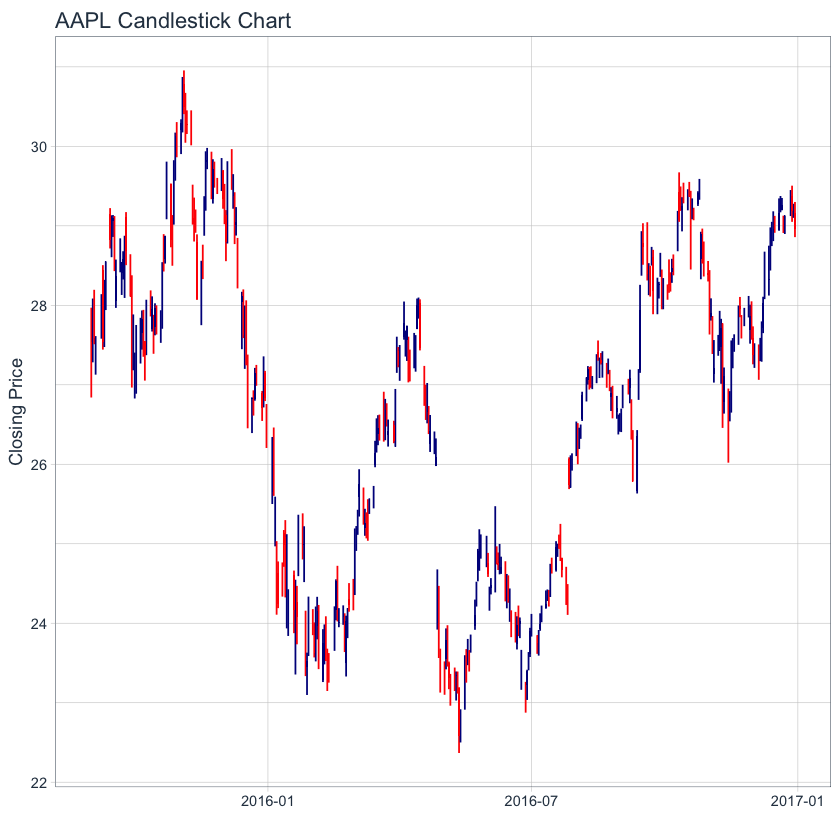

In [11]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Candlestick Chart", y = "Closing Price", x = "") +
    theme_tq()

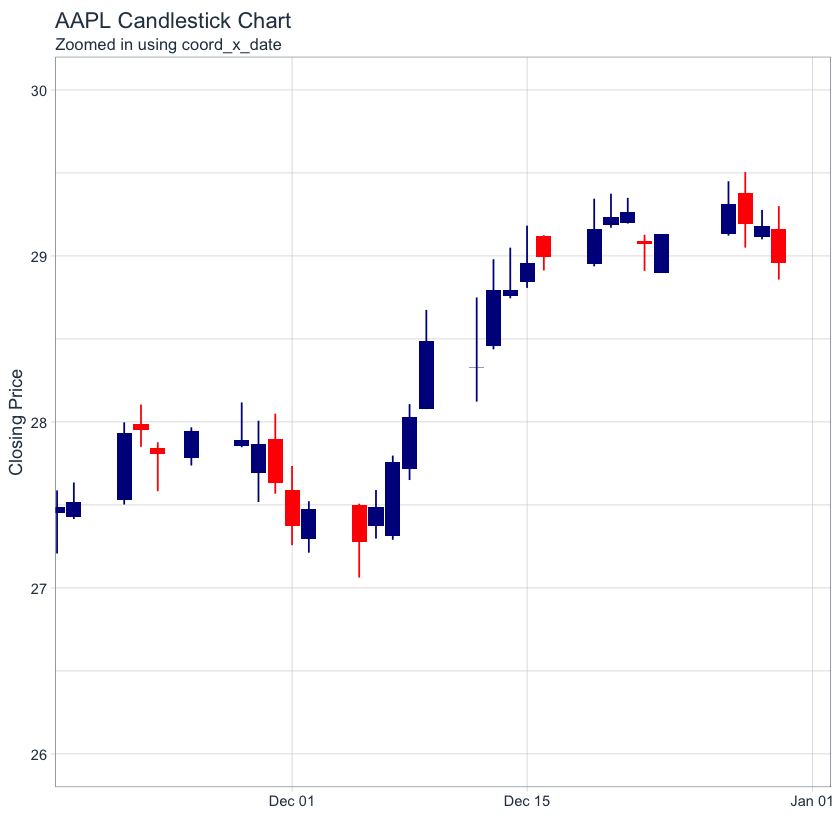

In [12]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "Zoomed in using coord_x_date",
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(6), end),
                 ylim = c(26, 30)) + 
    theme_tq()

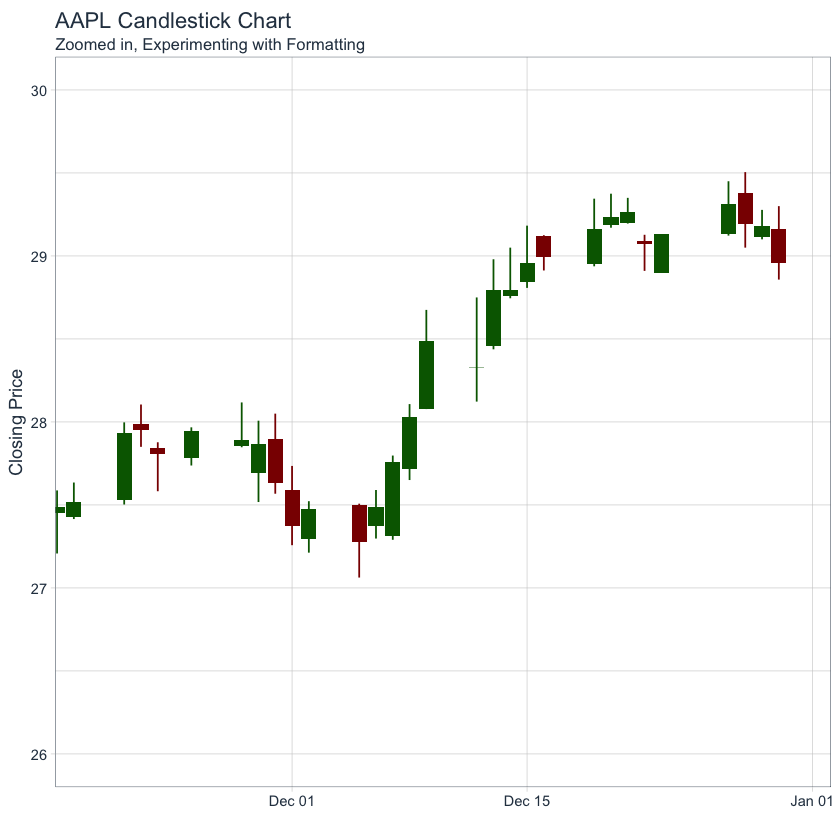

In [13]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close),
                        colour_up = "darkgreen", colour_down = "darkred", 
                        fill_up  = "darkgreen", fill_down  = "darkred") +
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "Zoomed in, Experimenting with Formatting",
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(6), end),
                 ylim = c(26, 30)) + 
    theme_tq()

## Visualizing trends

### Moving averages

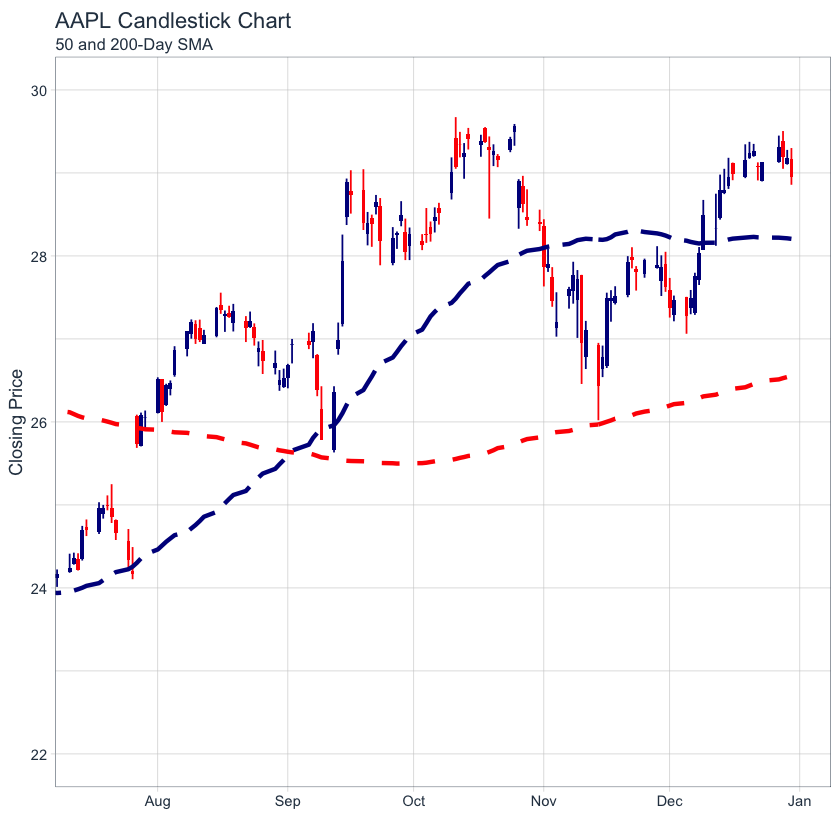

In [16]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close)) +
    geom_ma(ma_fun = SMA, n = 50, linetype = 5, size = 1.25) +
    geom_ma(ma_fun = SMA, n = 200, color = "red", size = 1.25) + 
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "50 and 200-Day SMA", 
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(24), end),
                 ylim = c(22, 30)) + 
    theme_tq()

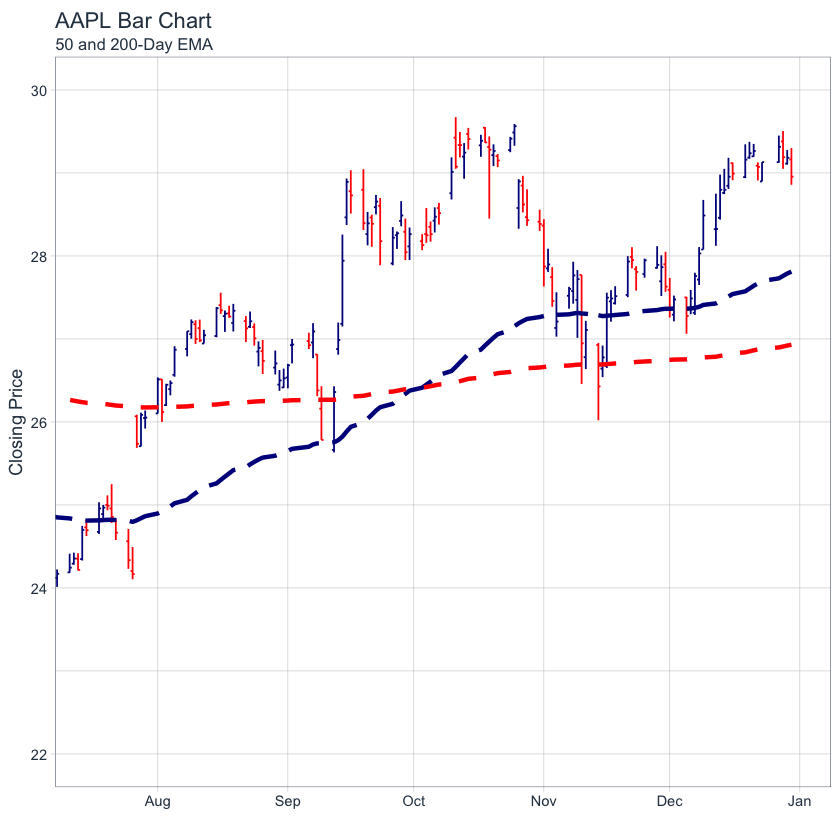

In [17]:
AAPL %>%
    ggplot(aes(x = date, y = close)) +
    geom_barchart(aes(open = open, high = high, low = low, close = close)) +
    geom_ma(ma_fun = EMA, n = 50, wilder = TRUE, linetype = 5, size = 1.25) +
    geom_ma(ma_fun = EMA, n = 200, wilder = TRUE, color = "red", size = 1.25) + 
    labs(title = "AAPL Bar Chart", 
         subtitle = "50 and 200-Day EMA", 
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(24), end),
                 ylim = c(22, 30)) +
    theme_tq()

### Bollinger bands

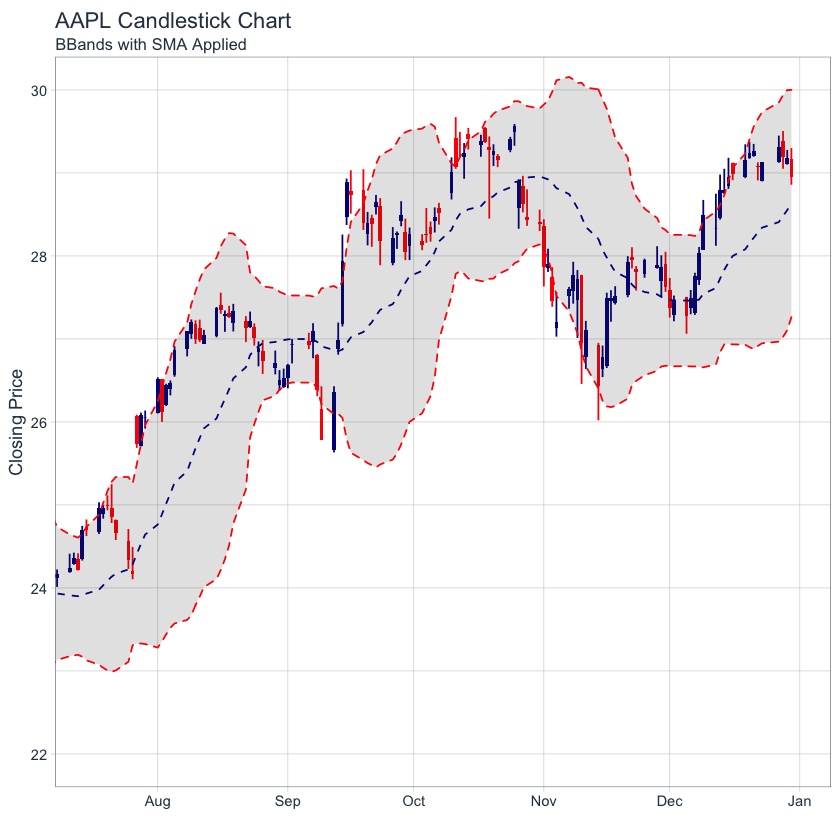

In [18]:
AAPL %>%
    ggplot(aes(x = date, y = close, open = open,
               high = high, low = low, close = close)) +
    geom_candlestick() +
    geom_bbands(ma_fun = SMA, sd = 2, n = 20) +
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "BBands with SMA Applied", 
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(24), end),
                 ylim = c(22, 30)) + 
    theme_tq()

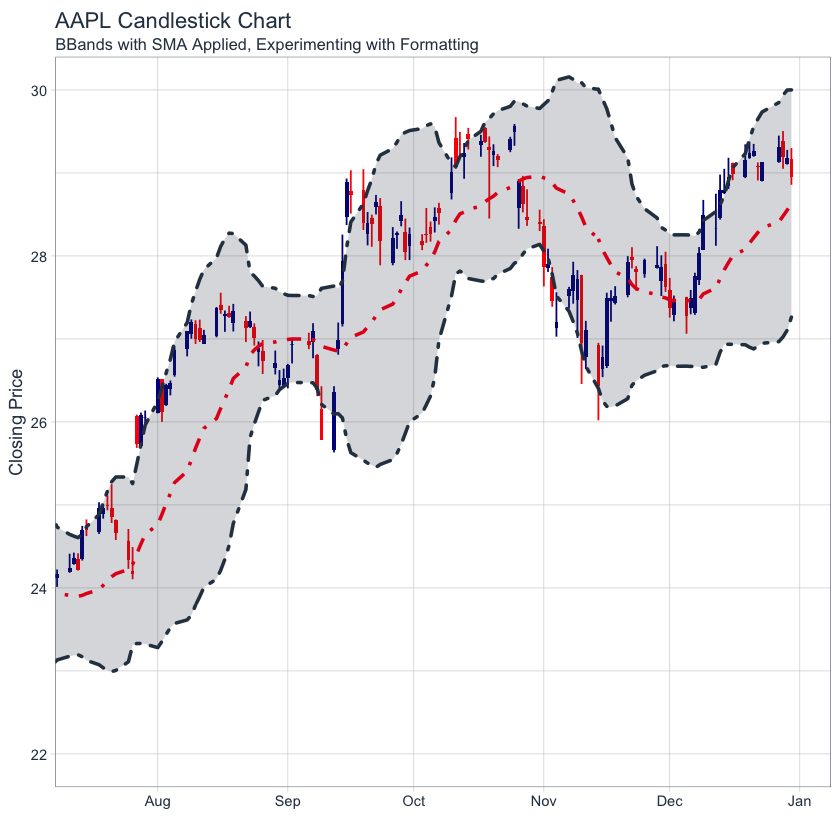

In [19]:
AAPL %>%
    ggplot(aes(x = date, y = close, open = open,
               high = high, low = low, close = close)) +
    geom_candlestick() +
    geom_bbands(ma_fun = SMA, sd = 2, n = 20, 
                linetype = 4, size = 1, alpha = 0.2, 
                fill        = palette_light()[[1]], 
                color_bands = palette_light()[[1]], 
                color_ma    = palette_light()[[2]]) +
    labs(title = "AAPL Candlestick Chart", 
         subtitle = "BBands with SMA Applied, Experimenting with Formatting", 
         y = "Closing Price", x = "") + 
    coord_x_date(xlim = c(end - weeks(24), end),
                 ylim = c(22, 30)) + 
    theme_tq()

In [1]:
library(pillar)

In [2]:
x <- 123456789 * (10 ^ c(-3, -5, NA, -8, -10))
pillar(x)

<pillar>
      <dbl>
123457.    
  1235.    
    NA     
     1.23  
     0.0123

In [4]:
packageVersion("IRkernel")

[1] ‘1.1.1’